In [0]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train, X_test = X_train/255,X_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [6]:
X_train.shape

(60000, 28, 28)

In [0]:
#Build the model
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dropout(0.2),
                                   tf.keras.layers.Dense(10,activation='softmax')

])

In [0]:
#Build the compile

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2996 - accuracy: 0.9121 - val_loss: 0.1406 - val_accuracy: 0.9569
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1469 - accuracy: 0.9571 - val_loss: 0.1129 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1092 - accuracy: 0.9665 - val_loss: 0.0931 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9718 - val_loss: 0.0772 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0745 - accuracy: 0.9769 - val_loss: 0.0746 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0733 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.0716 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

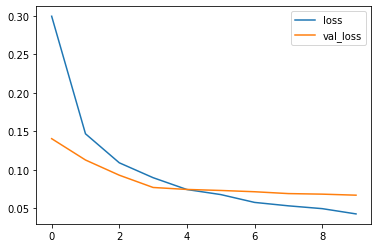

In [17]:
#Plot error per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

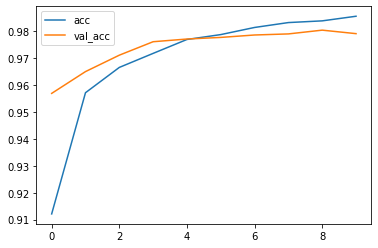

In [16]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
#Evaluate the model
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9791
[0.06716801226139069, 0.9790999889373779]


In [0]:
#Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [0]:
p_test = model.predict(X_test).argmax(axis=1)

Text(0.5, 1.0, 'True label: 3 Predicted: 5')

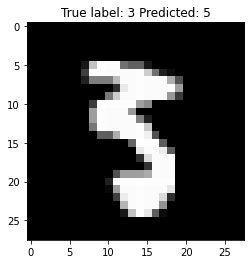

In [69]:
# Show me misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True label: {} Predicted: {}'.format(y_test[i],p_test[i]))

In [68]:
print(misclassified_idx)

[ 217  247  321  340  445  449  495  582  659  684  691  720  740  874
  947  951 1014 1032 1039 1044 1050 1107 1114 1128 1156 1226 1232 1247
 1260 1319 1325 1328 1378 1393 1395 1494 1500 1522 1530 1549 1553 1621
 1681 1709 1717 1754 1790 1850 1878 1901 1982 1984 2016 2070 2098 2109
 2118 2135 2162 2182 2186 2291 2293 2325 2369 2387 2406 2414 2422 2454
 2462 2488 2526 2597 2607 2648 2654 2743 2760 2810 2863 2896 2921 2927
 2939 2953 2970 3005 3060 3073 3102 3115 3117 3330 3422 3475 3503 3520
 3533 3558 3567 3597 3604 3674 3727 3751 3767 3776 3780 3796 3808 3818
 3853 3869 3893 3902 3906 3941 3943 3946 3976 3985 4000 4027 4065 4078
 4156 4163 4176 4199 4248 4271 4289 4321 4355 4360 4369 4425 4433 4497
 4500 4536 4571 4601 4731 4807 4823 4833 4880 4956 4966 4978 5457 5600
 5642 5676 5734 5749 5887 5936 5937 5955 5972 5973 6023 6059 6065 6071
 6166 6173 6555 6568 6571 6574 6597 6625 6651 6755 6783 6847 7216 7732
 7886 7921 8115 8311 8362 8520 8527 9009 9015 9019 9024 9427 9587 9634
 9664 